In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve
sm.init_printing(use_unicode=True) # for pretty printing
from IPython.display import display
import matplotlib.pyplot as plt # baseline modul
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The **Solow model with land** contains:

* $K_t$ is capital
* $L_t$ is labor
* $A_t$ is technology
* $X$ is land
* $Y_t = F(K_t,A_tL_t,X)$ is GDP

**GDP** is defined as

$ Y_{t}=K_{t}^{\alpha}(A_{t}L_{t})^{\beta}X^{\kappa}$

**Saving** is a constant fraction of GDP

$ S_t = sY_t,\, s\in(0,1) $

such that **capital accumulates** according to

$ K_{t+1}=sY_t+(1-\delta)K_t $

**Labour and technology accoumulates** as

$ L_{t+1} = (1+n)L_t $

$ A_{t+1} = (1+g)A_t $

The transition equation then normally becomes

$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[\tilde{k}_{t}^{\alpha}(\frac{X}{A_tL_t})^\kappa+(1-\delta)\tilde{k}_{t}] $

where $\tilde{k}_{t}= \dfrac{K_t}{A_tL_t}$

But in this case we need to look at the capital-output ratio, so the **transition equation** becomes

$ z_{t+1} = \frac{K_{t+1}}{Y_{t+1}} = \frac{K_{t+1}}{K_{t+1}^{\alpha}(A_{t+1}L_{t+1})^{\beta}X^{\kappa}} = \frac{K_{t+1}^{1-\alpha}}{(A_{t+1}L_{t+1})^{\beta}X^{\kappa}} \rightarrow z_{t+1} = \frac{1}{((1+g)(1+n))^\beta}(s+z_t(1-\delta))^{1-\alpha}z_t^\alpha$

# Steady state

In [10]:
def sim(s = 0.2):
    #s = 0.2
    g = 0.02
    n = 0.01
    beta = 0.5
    kappa = 0.2
    alpha = 0.3
    delta = 0.06
    X = 0.5

    def prod(K, A, L, X):
        return K ** alpha * (A * L) ** beta * X ** kappa

    T = 200
    Ks = np.zeros(T)
    Ys = np.zeros(T)
    Ls = np.zeros(T)
    As = np.zeros(T)
    Zs = np.zeros(T)

    Ks[0] = 1.0
    Ls[0] = 1.0
    As[0] = 2.0
    Ys[0] = prod(Ks[0], As[0], Ls[0], X)
    for t in range(1, T):
        Ks[t] = s * Ys[t-1] + (1 - delta) * Ks[t-1] 
        Ls[t] = (1 + n) * Ls[t-1]
        As[t] = (1 + g) * As[t-1]
        Ys[t] = prod(Ks[t], As[t], Ls[t], X)

    Zs = Ks / Ys
    return Ks, Ys, Ls, As, Zs

Ks, Ys, Ls, As, Zs = sim()
# SS must be last value **care only if we converge before 200 periods #
print(f'SS: {Zs[199]}')

SS: 2.4545856881522887


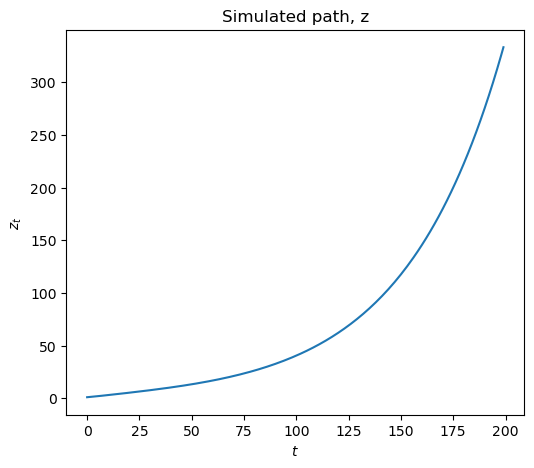

In [12]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(Ks)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$z_t$')

ax.set_title('Simulated path, z');

# Golden Rule

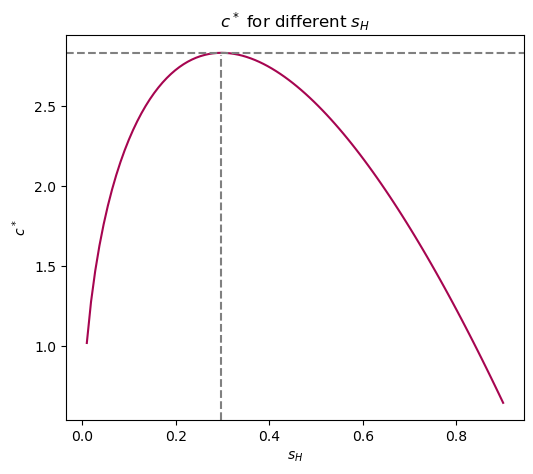

In [7]:
ss = np.linspace(0.01, 0.9, 100)

cs = []
for s in ss: 
    Ks, Ys, Ls, As, Zs = sim(s)
    y = Ys / Ls
    cs.append( (1 - s) * y[50]  )


fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ss,cs, color='#a60550')
ax.set_xlabel(r'$s_H$')
ax.set_ylabel(r'$c^*$')

# ss[cs.index(max(cs))]
# -> finds value in s grid for the max c value
plt.axvline(ss[cs.index(max(cs))],ymax=0.95,color='gray',linestyle='--')
plt.axhline(max(cs),xmax=1,color='gray',linestyle='--')
ax.set_title('$c^*$ for different $s_H$');